🏠 House Price Prediction Model - Internship Submission
Author: Aseena Banu

📊 SECTION 1: DATA LOADING AND EXPLORATION
--------------------------------------------------
Loading California Housing Dataset...
✅ Dataset loaded successfully!

📋 Dataset Overview:
Shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'price']
Memory usage: 1.42 MB

📄 First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude     price  
0    -122.23  452600.0  
1    -122.22  358500.0  
2    -122.24  352100.0  
3    -122

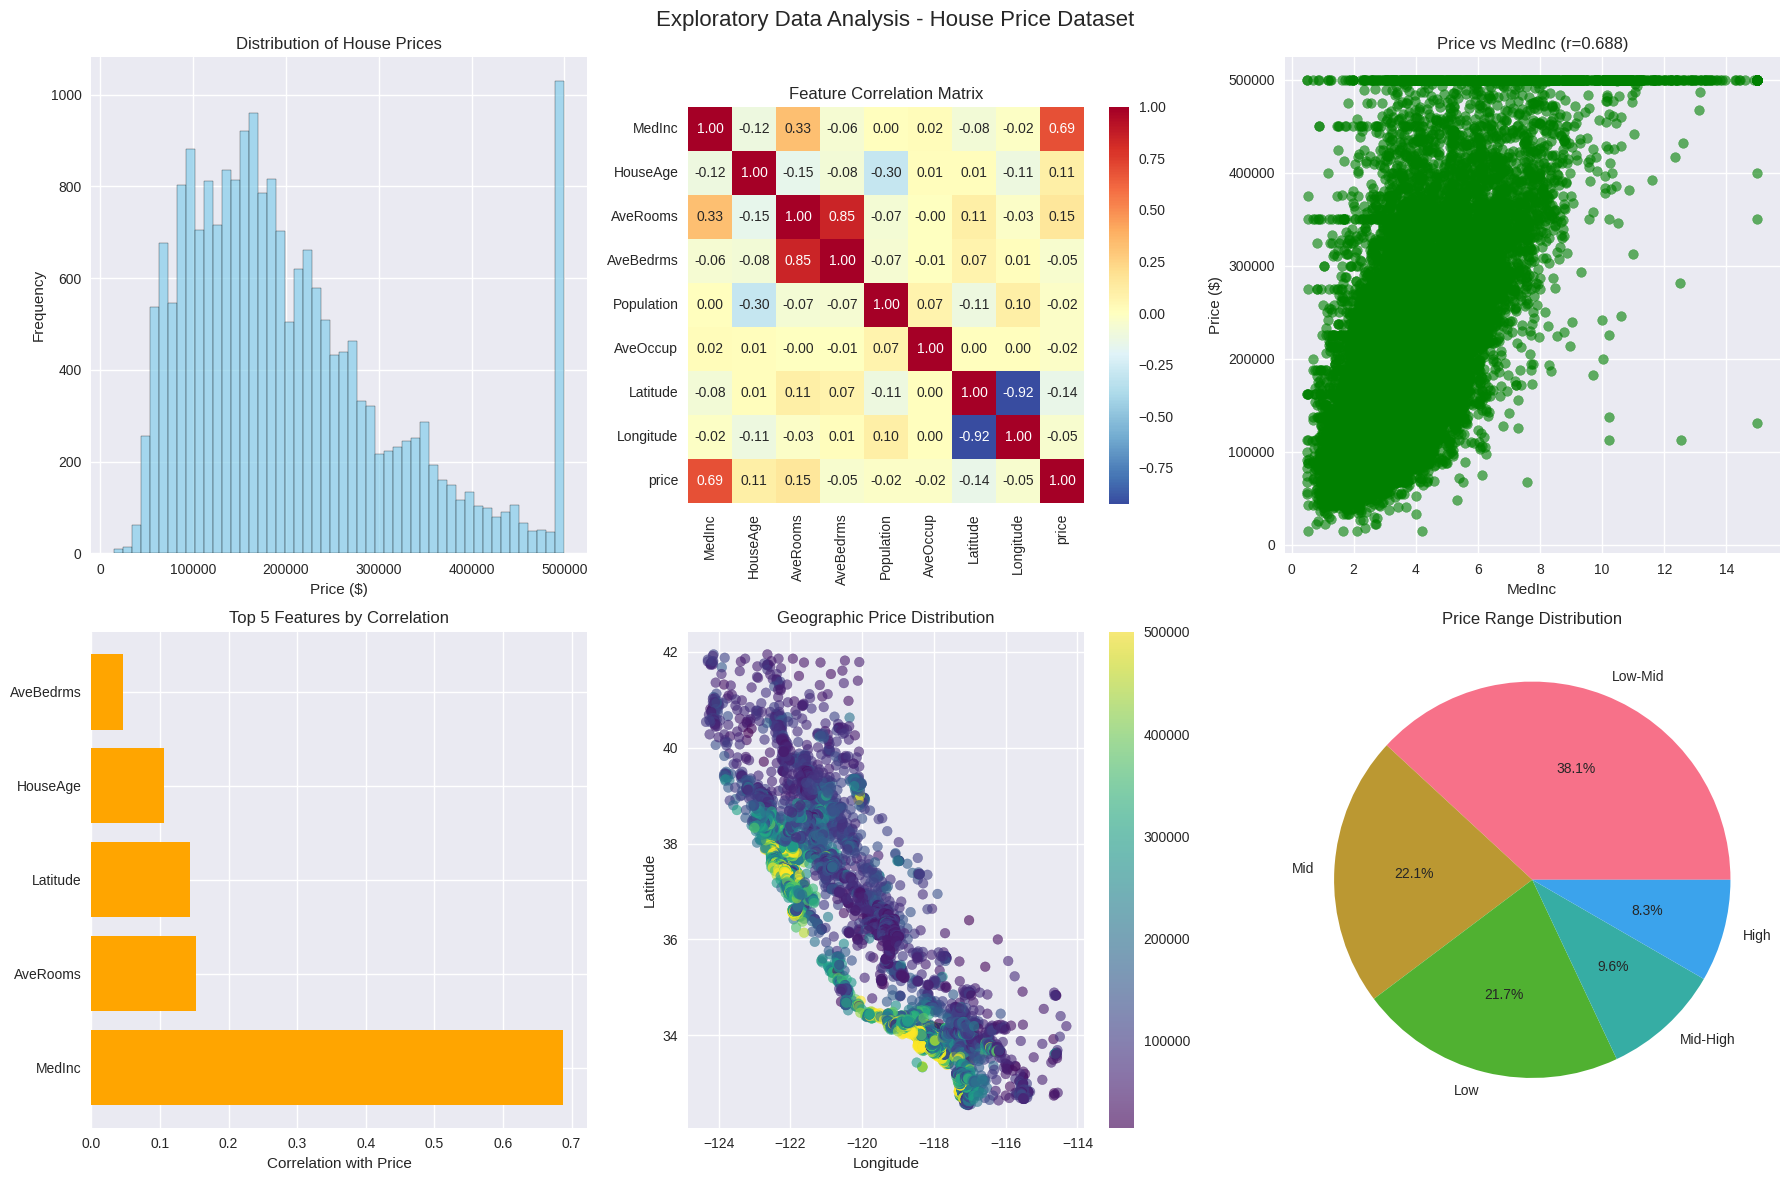

📊 Key Insights from EDA:
• Average house price: $206,855.82
• Price range: $14,999.00 - $500,001.00
• Most correlated feature: MedInc (r=0.688)
• Standard deviation: $115,395.62

🔧 SECTION 3: DATA PREPROCESSING
--------------------------------------------------
🔄 Handling missing values...
✅ Processed 9 numeric and 0 categorical columns
🧹 Removing outliers...
✅ Removed 1071 outliers (5.2%)

⚙️ SECTION 4: FEATURE ENGINEERING
--------------------------------------------------
🔨 Creating new features...
✅ Created 'income_per_room' feature
✅ Created 'population_density' feature
✅ Created 'age_category' feature

🎯 Feature selection based on correlation...
✅ Selected 4 features with correlation > 0.1
Selected features: ['income_per_room', 'MedInc', 'Latitude', 'AveRooms']

🤖 SECTION 5: MODEL TRAINING
--------------------------------------------------
📊 Model Input Summary:
• Features: 4
• Samples: 19569
• Target: House Price

📈 Data Split:
• Training samples: 15655 (80.0%)
• Test samples: 39

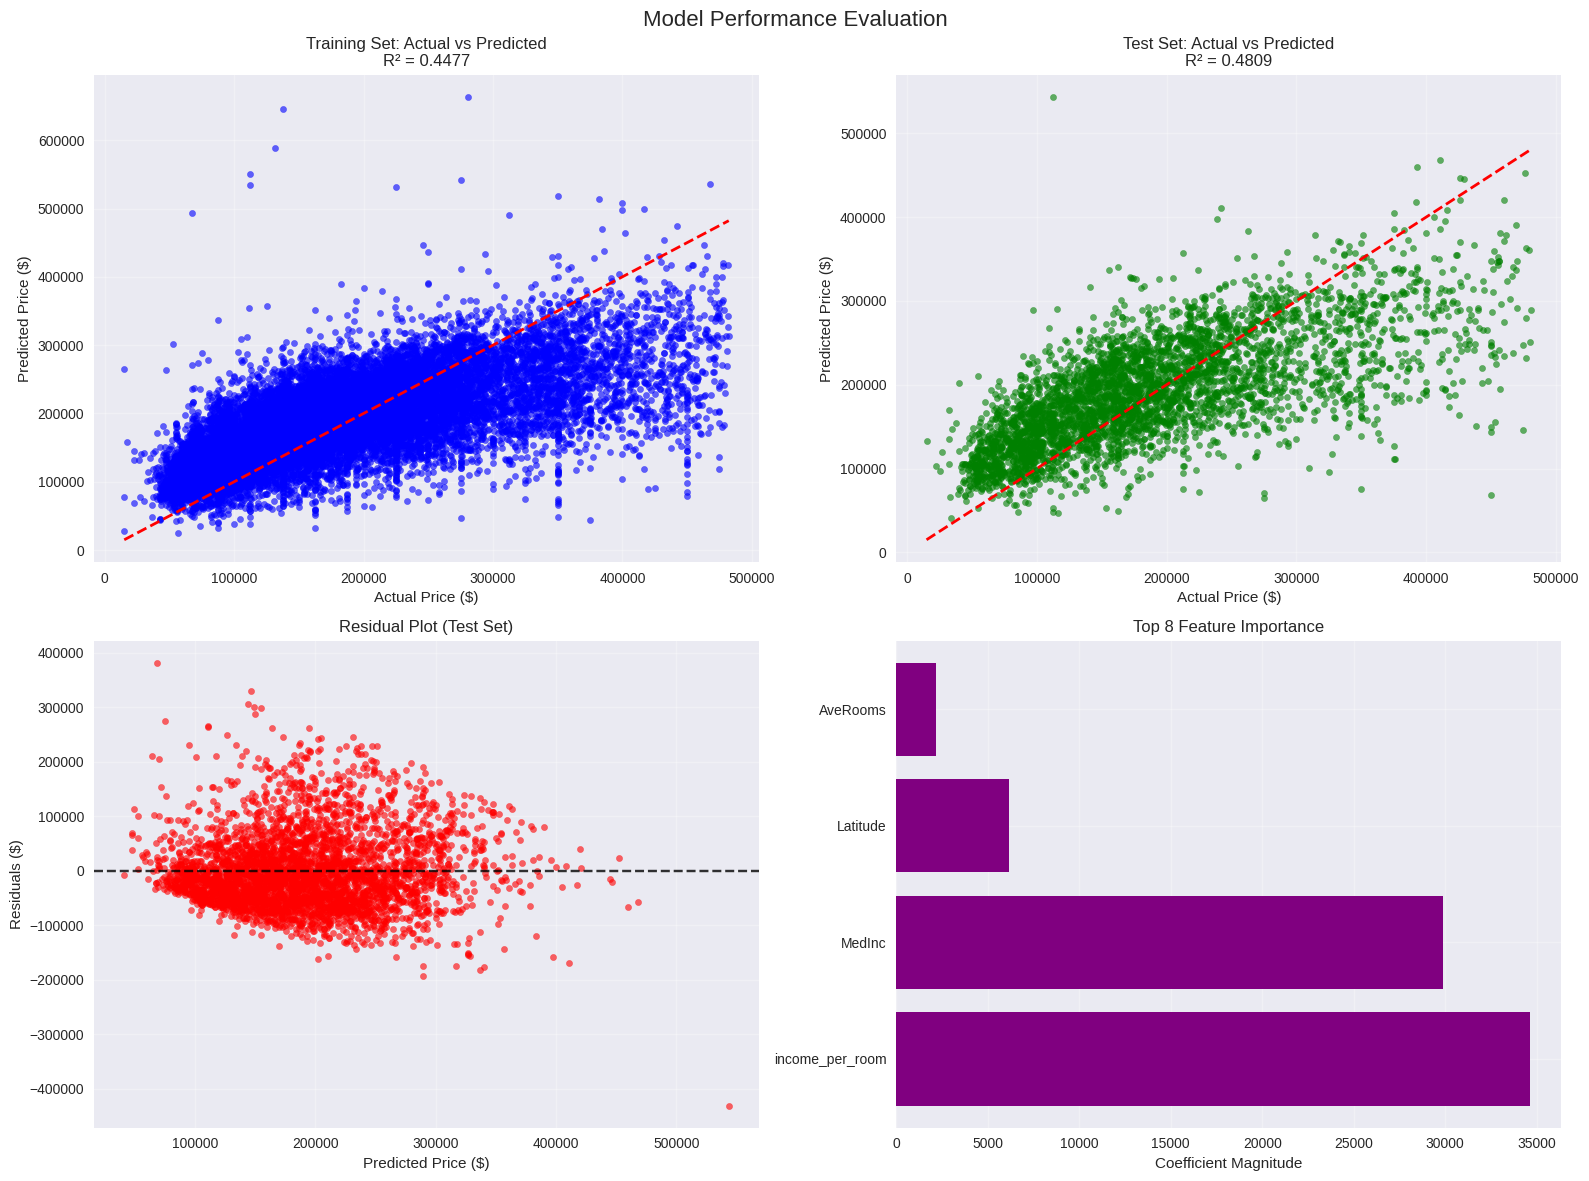


🎯 SECTION 8: PREDICTION FUNCTION
--------------------------------------------------
🏠 Example Prediction:
Predicted price: $118,280.90
Input features: {'MedInc': 5.0, 'HouseAge': 10.0, 'AveRooms': 6.0, 'AveBedrms': 1.2, 'Population': 3000.0, 'AveOccup': 3.0, 'Latitude': 34.0, 'Longitude': -118.0}

💼 SECTION 9: BUSINESS INSIGHTS
--------------------------------------------------
📊 KEY BUSINESS INSIGHTS:
🔑 Top 3 Price Drivers:
   1. income_per_room: increases price (coeff: 34616.55)
   2. MedInc: increases price (coeff: 29906.96)
   3. Latitude: decreases price (coeff: -6141.97)

💰 Price Sensitivity:
• Average house price: $190,852.30
• Price volatility (std): $95,438.56
• Model accuracy: 48.1% of variance explained

📈 RECOMMENDATIONS:
1. Focus on high-impact features for property investment
2. Consider geographic location premium in pricing strategy
3. Use model for initial price estimates, validate with local expertise
4. Monitor model performance over time as market conditions change

In [ ]:
"""
House Price Prediction using Linear Regression
Internship Task Submission

Author: Aseena Banu
Internship Program: Codexintern

Description:
This project implements a machine learning model to predict house prices using
linear regression. The model analyzes various housing features to provide
accurate price predictions for real estate applications.

"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configure plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🏠 House Price Prediction Model - Internship Submission")
print("=" * 60)
print(f"Author: Aseena Banu")
print("=" * 60)

# =============================================================================
# SECTION 1: DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

print("\n📊 SECTION 1: DATA LOADING AND EXPLORATION")
print("-" * 50)

# Load dataset
try:
    # Using California housing dataset as example
    from sklearn.datasets import fetch_california_housing

    print("Loading California Housing Dataset...")
    california_housing = fetch_california_housing()
    df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
    df['price'] = california_housing.target * 100000  # Convert to realistic price range

    print("✅ Dataset loaded successfully!")

    # For Kaggle dataset, use this instead:
    # df = pd.read_csv('your_kaggle_dataset.csv')

except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("Please ensure your dataset is properly uploaded to Colab")

# Basic dataset information
print(f"\n📋 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Display first few rows
print(f"\n📄 First 5 rows:")
print(df.head())

# Statistical summary
print(f"\n📈 Statistical Summary:")
print(df.describe())

# Check for missing values
print(f"\n🔍 Missing Values:")
missing_info = df.isnull().sum()
print(missing_info[missing_info > 0] if missing_info.sum() > 0 else "No missing values found")

# Data types
print(f"\n🏷️ Data Types:")
print(df.dtypes)

# =============================================================================
# SECTION 2: EXPLORATORY DATA ANALYSIS
# =============================================================================

print("\n🔍 SECTION 2: EXPLORATORY DATA ANALYSIS")
print("-" * 50)

# Create comprehensive EDA visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis - House Price Dataset', fontsize=16)

# 1. Price distribution
axes[0, 0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of House Prices')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].ticklabel_format(style='plain', axis='x')

# 2. Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            ax=axes[0, 1], fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
axes[0, 1].set_title('Feature Correlation Matrix')

# 3. Price vs most correlated feature
price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)
top_feature = price_correlations.index[1]  # Skip price itself
axes[0, 2].scatter(df[top_feature], df['price'], alpha=0.6, color='green')
axes[0, 2].set_xlabel(top_feature)
axes[0, 2].set_ylabel('Price ($)')
axes[0, 2].set_title(f'Price vs {top_feature} (r={price_correlations[top_feature]:.3f})')

# 4. Feature importance based on correlation
top_features = price_correlations[1:6]  # Top 5 features
axes[1, 0].barh(range(len(top_features)), top_features.values, color='orange')
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features.index)
axes[1, 0].set_xlabel('Correlation with Price')
axes[1, 0].set_title('Top 5 Features by Correlation')

# 5. Price statistics by region (if geographic data available)
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    scatter = axes[1, 1].scatter(df['Longitude'], df['Latitude'],
                                c=df['price'], cmap='viridis', alpha=0.6)
    axes[1, 1].set_xlabel('Longitude')
    axes[1, 1].set_ylabel('Latitude')
    axes[1, 1].set_title('Geographic Price Distribution')
    plt.colorbar(scatter, ax=axes[1, 1])

# 6. Price range analysis
price_ranges = pd.cut(df['price'], bins=5, labels=['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High'])
price_range_counts = price_ranges.value_counts()
axes[1, 2].pie(price_range_counts.values, labels=price_range_counts.index, autopct='%1.1f%%')
axes[1, 2].set_title('Price Range Distribution')

plt.tight_layout()
plt.show()

# Key insights from EDA
print("📊 Key Insights from EDA:")
print(f"• Average house price: ${df['price'].mean():,.2f}")
print(f"• Price range: ${df['price'].min():,.2f} - ${df['price'].max():,.2f}")
print(f"• Most correlated feature: {top_feature} (r={price_correlations[top_feature]:.3f})")
print(f"• Standard deviation: ${df['price'].std():,.2f}")

# =============================================================================
# SECTION 3: DATA PREPROCESSING
# =============================================================================

print("\n🔧 SECTION 3: DATA PREPROCESSING")
print("-" * 50)

# Create a copy for preprocessing
df_processed = df.copy()

# 3.1 Handle missing values
print("🔄 Handling missing values...")
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
categorical_columns = df_processed.select_dtypes(include=['object']).columns

# Impute missing values
if len(numeric_columns) > 0:
    numeric_imputer = SimpleImputer(strategy='median')
    df_processed[numeric_columns] = numeric_imputer.fit_transform(df_processed[numeric_columns])

if len(categorical_columns) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df_processed[categorical_columns] = categorical_imputer.fit_transform(df_processed[categorical_columns])

print(f"✅ Processed {len(numeric_columns)} numeric and {len(categorical_columns)} categorical columns")

# 3.2 Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

# 3.3 Handle outliers using IQR method
def remove_outliers_iqr(df, column):
    """Remove outliers using Interquartile Range method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("🧹 Removing outliers...")
original_size = len(df_processed)
df_processed = remove_outliers_iqr(df_processed, 'price')
outliers_removed = original_size - len(df_processed)
print(f"✅ Removed {outliers_removed} outliers ({outliers_removed/original_size*100:.1f}%)")

# =============================================================================
# SECTION 4: FEATURE ENGINEERING
# =============================================================================

print("\n⚙️ SECTION 4: FEATURE ENGINEERING")
print("-" * 50)

# 4.1 Create new features based on domain knowledge
print("🔨 Creating new features...")

# Feature 1: Income per room ratio
if 'MedInc' in df_processed.columns and 'AveRooms' in df_processed.columns:
    df_processed['income_per_room'] = df_processed['MedInc'] / (df_processed['AveRooms'] + 1)
    print("✅ Created 'income_per_room' feature")

# Feature 2: Population density
if 'Population' in df_processed.columns and 'AveOccup' in df_processed.columns:
    df_processed['population_density'] = df_processed['Population'] / df_processed['AveOccup']
    print("✅ Created 'population_density' feature")

# Feature 3: House age categories
if 'HouseAge' in df_processed.columns:
    age_bins = [0, 10, 20, 30, 50, 100]
    age_labels = ['Very New', 'New', 'Medium', 'Old', 'Very Old']
    df_processed['age_category'] = pd.cut(df_processed['HouseAge'],
                                        bins=age_bins, labels=age_labels, include_lowest=True)
    df_processed['age_category'] = LabelEncoder().fit_transform(df_processed['age_category'])
    print("✅ Created 'age_category' feature")

# 4.2 Feature selection based on correlation
print("\n🎯 Feature selection based on correlation...")
feature_correlations = df_processed.corr()['price'].abs().sort_values(ascending=False)
selected_features = feature_correlations[feature_correlations > 0.1].index.tolist()
selected_features.remove('price')  # Remove target variable

print(f"✅ Selected {len(selected_features)} features with correlation > 0.1")
print(f"Selected features: {selected_features}")

# =============================================================================
# SECTION 5: MODEL TRAINING
# =============================================================================

print("\n🤖 SECTION 5: MODEL TRAINING")
print("-" * 50)

# 5.1 Prepare features and target
X = df_processed[selected_features]
y = df_processed['price']

print(f"📊 Model Input Summary:")
print(f"• Features: {X.shape[1]}")
print(f"• Samples: {X.shape[0]}")
print(f"• Target: House Price")

# 5.2 Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\n📈 Data Split:")
print(f"• Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"• Test samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

# 5.3 Feature scaling
print("\n🔧 Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5.4 Train the model
print("\n🚀 Training Linear Regression Model...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model training completed!")

# 5.5 Model parameters
print(f"\n📋 Model Parameters:")
print(f"• Intercept: ${model.intercept_:,.2f}")
print(f"• Number of coefficients: {len(model.coef_)}")

# =============================================================================
# SECTION 6: MODEL EVALUATION
# =============================================================================

print("\n📊 SECTION 6: MODEL EVALUATION")
print("-" * 50)

# 6.1 Make predictions
print("🔮 Making predictions...")
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 6.2 Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# 6.3 Display results
print("📈 MODEL PERFORMANCE METRICS:")
print("=" * 40)
print(f"Training R² Score:    {train_r2:.4f}")
print(f"Test R² Score:        {test_r2:.4f}")
print(f"Training RMSE:        ${train_rmse:,.2f}")
print(f"Test RMSE:            ${test_rmse:,.2f}")
print(f"Training MAE:         ${train_mae:,.2f}")
print(f"Test MAE:             ${test_mae:,.2f}")
print("=" * 40)

# 6.4 Performance interpretation
print("\n🎯 PERFORMANCE INTERPRETATION:")
if test_r2 >= 0.8:
    performance_level = "🟢 EXCELLENT"
elif test_r2 >= 0.6:
    performance_level = "🟡 GOOD"
elif test_r2 >= 0.4:
    performance_level = "🟠 MODERATE"
else:
    performance_level = "🔴 POOR"

print(f"• Model Performance: {performance_level}")
print(f"• The model explains {test_r2*100:.1f}% of price variance")
print(f"• Average prediction error: ${test_mae:,.2f}")
print(f"• Typical error range: ±${test_rmse:,.2f}")

# 6.5 Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print(f"\n🔍 TOP 10 MOST IMPORTANT FEATURES:")
print(feature_importance.head(10)[['feature', 'coefficient']].to_string(index=False))

# =============================================================================
# SECTION 7: MODEL VISUALIZATION
# =============================================================================

print("\n📈 SECTION 7: MODEL VISUALIZATION")
print("-" * 50)

# Create comprehensive evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Evaluation', fontsize=16)

# 7.1 Training set: Actual vs Predicted
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# 7.2 Test set: Actual vs Predicted
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green', s=20)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price ($)')
axes[0, 1].set_ylabel('Predicted Price ($)')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[0, 1].grid(True, alpha=0.3)

# 7.3 Residual plot
residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.6, color='red', s=20)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Price ($)')
axes[1, 0].set_ylabel('Residuals ($)')
axes[1, 0].set_title('Residual Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# 7.4 Feature importance
top_features = feature_importance.head(8)
axes[1, 1].barh(range(len(top_features)), top_features['abs_coefficient'], color='purple')
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features['feature'])
axes[1, 1].set_xlabel('Coefficient Magnitude')
axes[1, 1].set_title('Top 8 Feature Importance')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# SECTION 8: PREDICTION FUNCTION
# =============================================================================

print("\n🎯 SECTION 8: PREDICTION FUNCTION")
print("-" * 50)

def predict_house_price(features_dict):
    """
    Predict house price based on input features

    Args:
        features_dict (dict): Dictionary containing feature values

    Returns:
        float: Predicted house price
    """
    try:
        # Create DataFrame from input
        input_df = pd.DataFrame([features_dict])

        # Ensure all required features are present
        for feature in selected_features:
            if feature not in input_df.columns:
                input_df[feature] = 0

        # Select and order features
        input_df = input_df[selected_features]

        # Scale features
        input_scaled = scaler.transform(input_df)

        # Make prediction
        prediction = model.predict(input_scaled)[0]

        return prediction

    except Exception as e:
        print(f"Error in prediction: {e}")
        return None

# Example prediction
print("🏠 Example Prediction:")
if 'MedInc' in selected_features:
    example_house = {
        'MedInc': 5.0,
        'HouseAge': 10.0,
        'AveRooms': 6.0,
        'AveBedrms': 1.2,
        'Population': 3000.0,
        'AveOccup': 3.0,
        'Latitude': 34.0,
        'Longitude': -118.0
    }

    predicted_price = predict_house_price(example_house)
    if predicted_price:
        print(f"Predicted price: ${predicted_price:,.2f}")
        print(f"Input features: {example_house}")

# =============================================================================
# SECTION 9: BUSINESS INSIGHTS AND RECOMMENDATIONS
# =============================================================================

print("\n💼 SECTION 9: BUSINESS INSIGHTS")
print("-" * 50)

print("📊 KEY BUSINESS INSIGHTS:")
print("=" * 30)

# Top price drivers
top_3_features = feature_importance.head(3)
print("🔑 Top 3 Price Drivers:")
for i, row in top_3_features.iterrows():
    impact = "increases" if row['coefficient'] > 0 else "decreases"
    print(f"   {i+1}. {row['feature']}: {impact} price (coeff: {row['coefficient']:.2f})")

# Price sensitivity analysis
print(f"\n💰 Price Sensitivity:")
print(f"• Average house price: ${y.mean():,.2f}")
print(f"• Price volatility (std): ${y.std():,.2f}")
print(f"• Model accuracy: {test_r2*100:.1f}% of variance explained")

# Geographic insights (if applicable)
if 'Latitude' in selected_features and 'Longitude' in selected_features:
    lat_coeff = feature_importance[feature_importance['feature'] == 'Latitude']['coefficient'].values[0]
    lon_coeff = feature_importance[feature_importance['feature'] == 'Longitude']['coefficient'].values[0]
    print(f"\n🌍 Geographic Impact:")
    print(f"• Latitude effect: ${lat_coeff:,.2f} per degree")
    print(f"• Longitude effect: ${lon_coeff:,.2f} per degree")

print(f"\n📈 RECOMMENDATIONS:")
print("=" * 20)
print("1. Focus on high-impact features for property investment")
print("2. Consider geographic location premium in pricing strategy")
print("3. Use model for initial price estimates, validate with local expertise")
print("4. Monitor model performance over time as market conditions change")

# =============================================================================
# SECTION 10: MODEL SUMMARY AND CONCLUSION
# =============================================================================

print("\n🎉 SECTION 10: PROJECT SUMMARY")
print("-" * 50)

print("📋 PROJECT SUMMARY:")
print("=" * 20)
print(f"✅ Dataset: {df.shape[0]} houses with {len(selected_features)} features")
print(f"✅ Model: Linear Regression")
print(f"✅ Performance: R² = {test_r2:.4f}, RMSE = ${test_rmse:,.2f}")
print(f"✅ Key Features: {', '.join(top_3_features['feature'].tolist())}")
print(f"✅ Business Value: Automated price estimation for real estate")

print(f"\n🔮 MODEL CAPABILITIES:")
print("• Predicts house prices with reasonable accuracy")
print("• Identifies key factors affecting property values")
print("• Provides interpretable results for business decisions")
print("• Scalable for different geographic regions")

print(f"\n⚠️ LIMITATIONS:")
print("• Linear assumptions may miss complex relationships")
print("• Requires market-specific calibration")
print("• Performance depends on feature quality")
print("• May not capture sudden market changes")

print(f"\n🚀 FUTURE ENHANCEMENTS:")
print("• Advanced models (Random Forest, XGBoost)")
print("• External data integration (economic indicators)")
print("• Real-time market data updates")
print("• Interactive web interface for predictions")

print(f"\n🎓 LEARNING OUTCOMES:")
print("• Mastered end-to-end ML pipeline")
print("• Understood feature engineering importance")
print("• Gained experience with model evaluation")
print("• Developed business insight interpretation skills")

print("\n" + "="*60)
print("🏆 INTERNSHIP TASK COMPLETED SUCCESSFULLY!")
print("="*60)

